In [340]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn as sl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import plot_tree
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
import csv
%matplotlib inline

In [341]:
df1=pd.read_csv('Data Analysis_2024 1st Case_Data.csv',index_col=False)
df1

,Country,Year,Status,Life_expectancy,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723,4.36,0.000000,68,31,27.1,42,67,7.13,65,33.6,454.366654,12777511.0,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715,4.06,0.000000,7,998,26.7,41,7,6.52,68,36.7,453.351155,12633897.0,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73,4.43,0.000000,73,304,26.3,40,73,6.53,71,39.8,57.348340,125525.0,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686,1.72,0.000000,76,529,25.9,39,76,6.16,75,42.1,548.587312,12366165.0,1.7,0.427,9.8


In [342]:
df1=df1.drop(["Country","Status"],axis=1) 
df1

,Year,Life_expectancy,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_5_9_years,Income_composition_of_resources,Schooling
0,2015,65.0,263,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.3,0.479,10.1
1,2014,59.9,271,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,0.476,10.0
2,2013,59.9,268,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,2012,59.5,272,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,18.0,0.463,9.8
4,2011,59.2,275,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,2004,44.3,723,4.36,0.000000,68,31,27.1,42,67,7.13,65,33.6,454.366654,12777511.0,9.4,0.407,9.2
1645,2003,44.5,715,4.06,0.000000,7,998,26.7,41,7,6.52,68,36.7,453.351155,12633897.0,9.9,0.418,9.5
1646,2002,44.8,73,4.43,0.000000,73,304,26.3,40,73,6.53,71,39.8,57.348340,125525.0,1.3,0.427,10.0
1647,2001,45.3,686,1.72,0.000000,76,529,25.9,39,76,6.16,75,42.1,548.587312,12366165.0,1.7,0.427,9.8


In [343]:
Index_def =df1[(df1['Year']==2010) |(df1['Year']==2012)].index
df1=df1.drop(Index_def)
df1

,Year,Life_expectancy,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_5_9_years,Income_composition_of_resources,Schooling
0,2015,65.0,263,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.3,0.479,10.1
1,2014,59.9,271,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,0.476,10.0
2,2013,59.9,268,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,0.470,9.9
4,2011,59.2,275,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,0.454,9.5
6,2009,58.6,281,0.01,56.762217,63,2861,16.2,106,63,9.42,63,0.1,445.893298,284331.0,18.7,0.434,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,2004,44.3,723,4.36,0.000000,68,31,27.1,42,67,7.13,65,33.6,454.366654,12777511.0,9.4,0.407,9.2
1645,2003,44.5,715,4.06,0.000000,7,998,26.7,41,7,6.52,68,36.7,453.351155,12633897.0,9.9,0.418,9.5
1646,2002,44.8,73,4.43,0.000000,73,304,26.3,40,73,6.53,71,39.8,57.348340,125525.0,1.3,0.427,10.0
1647,2001,45.3,686,1.72,0.000000,76,529,25.9,39,76,6.16,75,42.1,548.587312,12366165.0,1.7,0.427,9.8


In [344]:
X=df1.drop(["Life_expectancy","Year"],axis=1)
X

,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_5_9_years,Income_composition_of_resources,Schooling
0,263,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.3,0.479,10.1
1,271,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,0.476,10.0
2,268,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,0.470,9.9
4,275,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,0.454,9.5
6,281,0.01,56.762217,63,2861,16.2,106,63,9.42,63,0.1,445.893298,284331.0,18.7,0.434,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,723,4.36,0.000000,68,31,27.1,42,67,7.13,65,33.6,454.366654,12777511.0,9.4,0.407,9.2
1645,715,4.06,0.000000,7,998,26.7,41,7,6.52,68,36.7,453.351155,12633897.0,9.9,0.418,9.5
1646,73,4.43,0.000000,73,304,26.3,40,73,6.53,71,39.8,57.348340,125525.0,1.3,0.427,10.0
1647,686,1.72,0.000000,76,529,25.9,39,76,6.16,75,42.1,548.587312,12366165.0,1.7,0.427,9.8


In [345]:
Y=pd.DataFrame(df1.iloc[:,1])
Y

,Life_expectancy
0,65.0
1,59.9
2,59.9
4,59.2
6,58.6
...,...
1644,44.3
1645,44.5
1646,44.8
1647,45.3


|--- Adult_Mortality <= 205.00
|   |--- Income_composition_of_resources <= 0.56
|   |   |--- Schooling <= 12.15
|   |   |   |--- class: 0
|   |   |--- Schooling >  12.15
|   |   |   |--- class: 1
|   |--- Income_composition_of_resources >  0.56
|   |   |--- Alcohol <= 0.39
|   |   |   |--- class: 1
|   |   |--- Alcohol >  0.39
|   |   |   |--- class: 1
|--- Adult_Mortality >  205.00
|   |--- Income_composition_of_resources <= 0.77
|   |   |--- Alcohol <= 13.60
|   |   |   |--- class: 0
|   |   |--- Alcohol >  13.60
|   |   |   |--- class: 1
|   |--- Income_composition_of_resources >  0.77
|   |   |--- class: 1



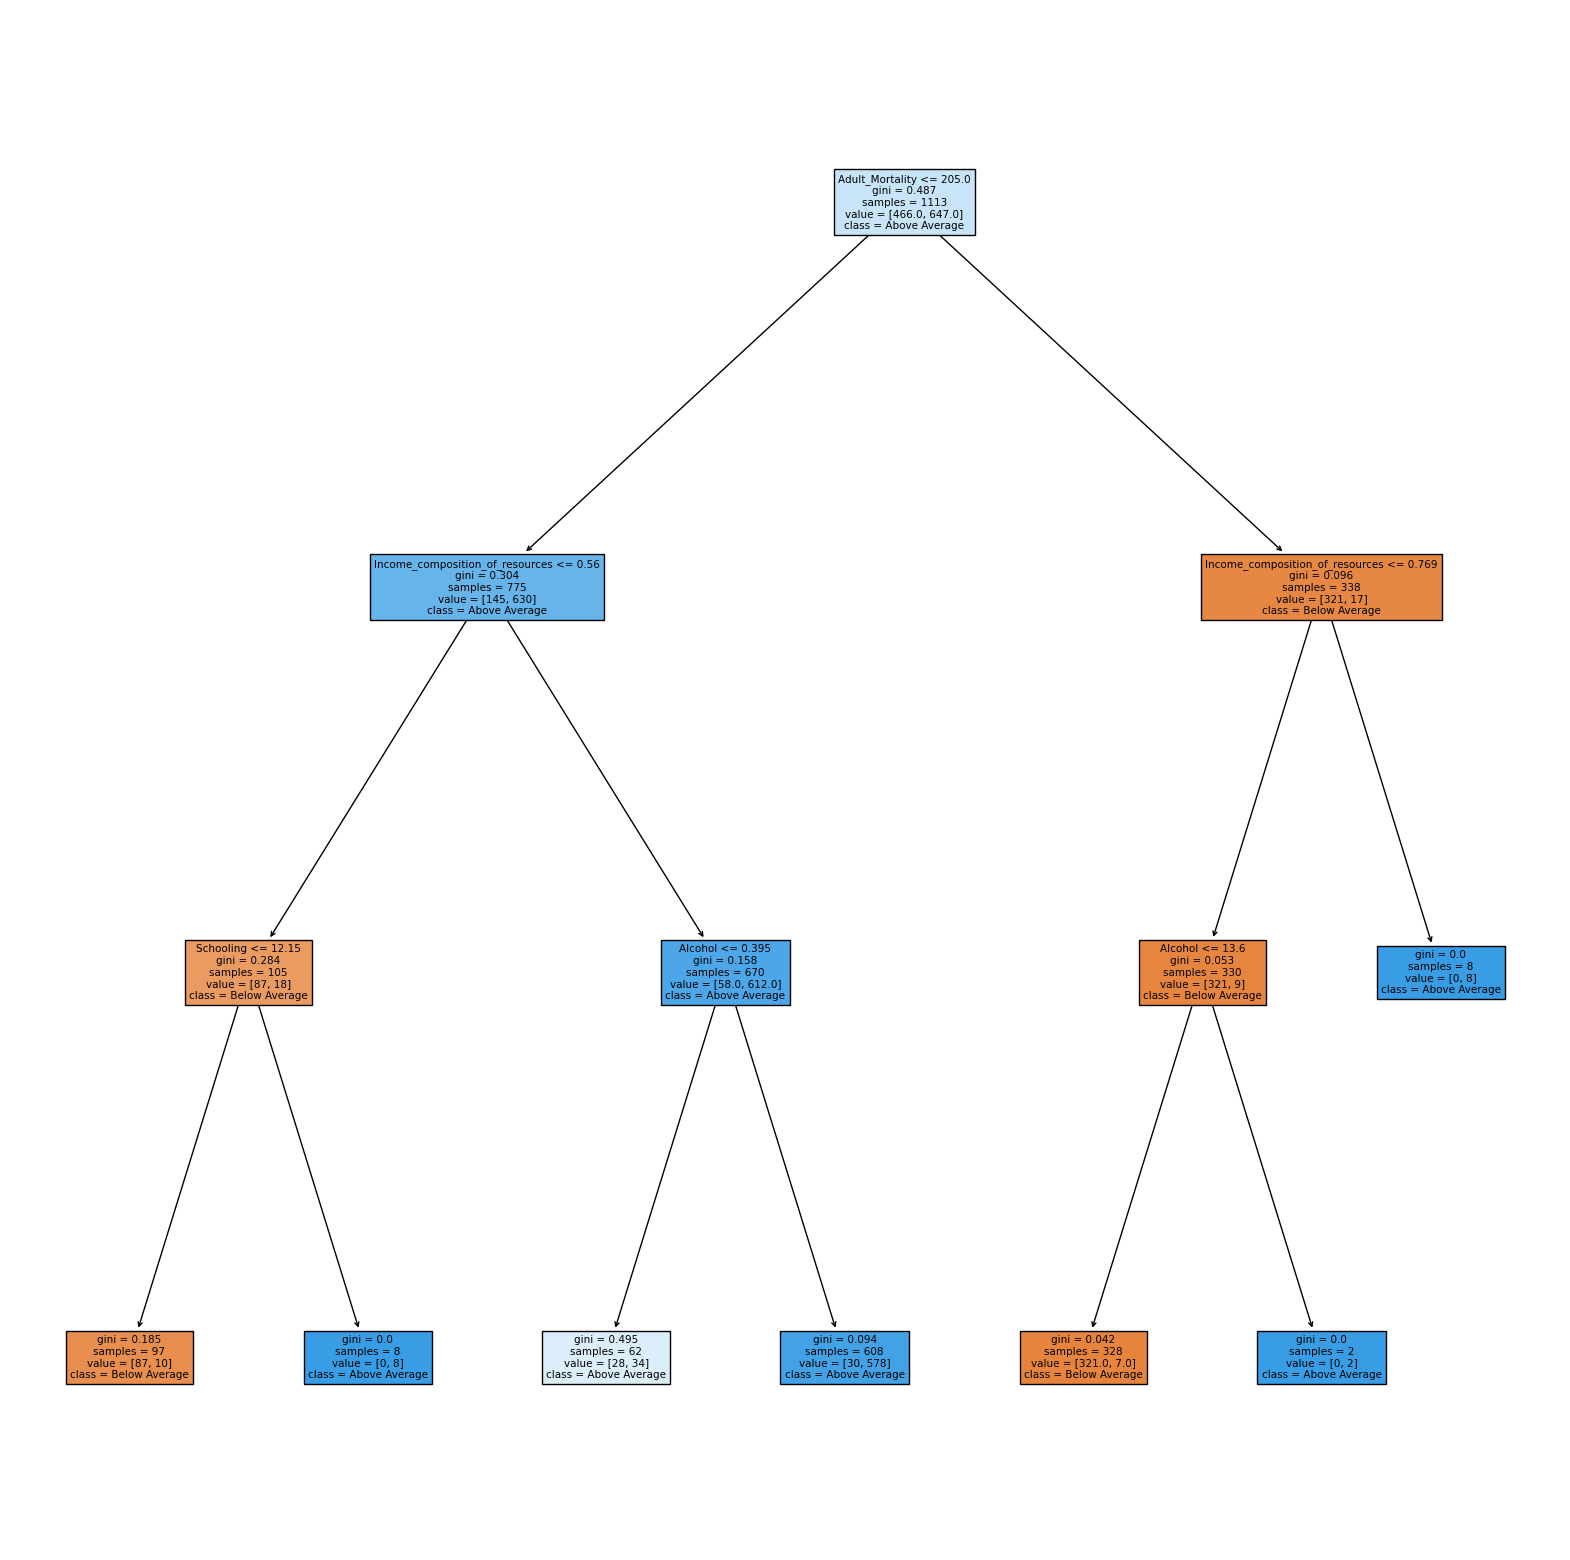

In [346]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Calculate the mean of Life_expectancy
mean_average = df1['Life_expectancy'].mean()

# Create a binary variable for Life_expectancy
df1['Life_expectancy_binary'] = (df1['Life_expectancy'] > mean_average).astype(int)

# Drop the original Life_expectancy and Year columns
df1.drop(['Life_expectancy', 'Year'], axis=1, inplace=True)

# Split the data into features (X) and target (Y)
X = df1.drop('Life_expectancy_binary', axis=1)
Y = df1['Life_expectancy_binary']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with max depth of 3
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the classifier
tree.fit(X_train, y_train)

# Export the textual representation of the tree
tree_text = export_text(tree, feature_names=X.columns.tolist())
print(tree_text)

# Optional: Visualize the tree
plt.figure(figsize=(20, 20))
plot_tree(tree, feature_names=X.columns, class_names=['Below Average', 'Above Average'], filled=True)
plt.show()


In [347]:
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Unpruned Tree MSE:", mse)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Unpruned Tree MSE: 0.07885304659498207
Accuracy: 0.921146953405018


Accuracy: 0.9390681003584229
|--- Income_composition_of_resources <= 0.65
|   |--- BMI <= 44.85
|   |   |--- Adult_Mortality <= 176.50
|   |   |   |--- class: 0
|   |   |--- Adult_Mortality >  176.50
|   |   |   |--- class: 0
|   |--- BMI >  44.85
|   |   |--- Adult_Mortality <= 216.00
|   |   |   |--- class: 1
|   |   |--- Adult_Mortality >  216.00
|   |   |   |--- class: 0
|--- Income_composition_of_resources >  0.65
|   |--- Adult_Mortality <= 205.00
|   |   |--- Income_composition_of_resources <= 0.70
|   |   |   |--- class: 1
|   |   |--- Income_composition_of_resources >  0.70
|   |   |   |--- class: 1
|   |--- Adult_Mortality >  205.00
|   |   |--- BMI <= 57.45
|   |   |   |--- class: 0
|   |   |--- BMI >  57.45
|   |   |   |--- class: 1



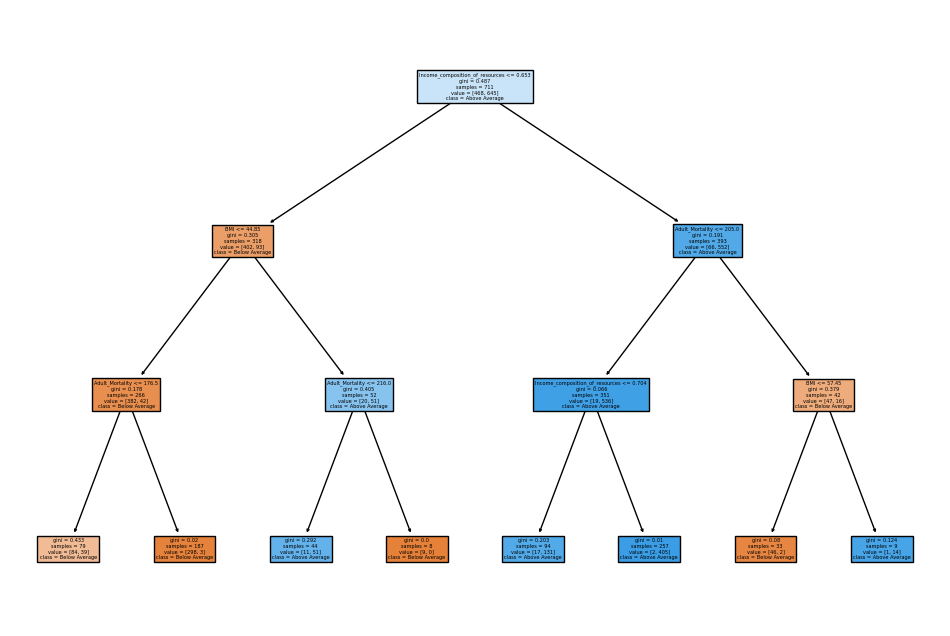

Confusion Matrix:
[[113  15]
 [  2 149]]


In [348]:
from sklearn.ensemble import BaggingClassifier
# Initialize the BaggingClassifier with 200 estimators
bagging_clf = BaggingClassifier(estimator=tree, n_estimators=200, random_state=42)

# Train the bagging classifier
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Export the textual representation of the first tree in the ensemble
first_tree = bagging_clf.estimators_[0]
tree_text = export_text(first_tree, feature_names=X.columns.tolist())
print(tree_text)

# Optional: Visualize the first tree in the ensemble
plt.figure(figsize=(12, 8))
plot_tree(first_tree, feature_names=X.columns, class_names=['Below Average', 'Above Average'], filled=True)
plt.show()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [349]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the random forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Evaluate the random forest classifier on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optional: Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9713261648745519
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       128
           1       0.96      0.99      0.97       151

    accuracy                           0.97       279
   macro avg       0.97      0.97      0.97       279
weighted avg       0.97      0.97      0.97       279

Confusion Matrix:
[[122   6]
 [  2 149]]


In [350]:
from sklearn.ensemble import GradientBoostingClassifier
# define a Gradient Boosting estimator
gbr = GradientBoostingClassifier(max_depth=1,n_estimators=200, learning_rate=1, random_state=42)

# train the Gradient Boosting estimator on the training data
gbr.fit(X_train, y_train)

# evaluate the Gradient Boosting estimator on the testing data
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Mean Squared Error: 0.025089605734767026
Accuracy: 0.974910394265233
Confusion Matrix:
[[124   4]
 [  3 148]]


Best max_depth: 12
Accuracy: 0.9498207885304659


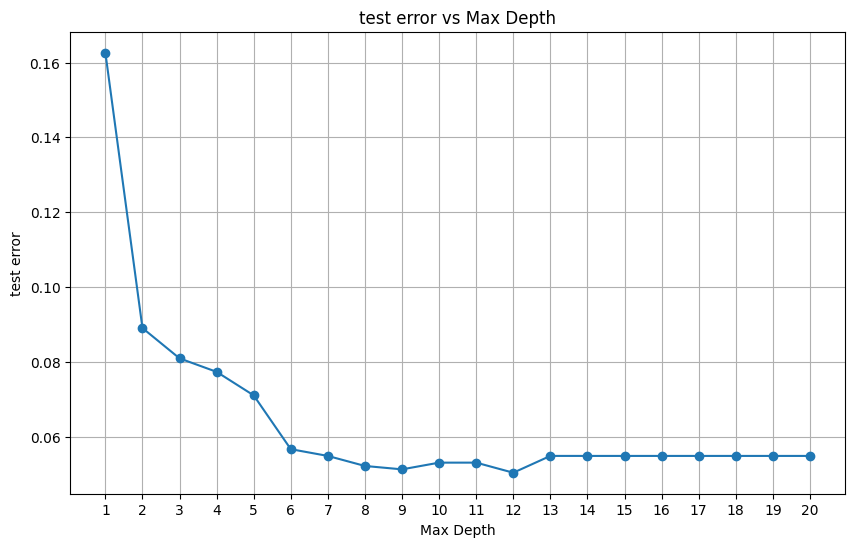

In [351]:
#erwthma 5
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Define the range of max_depth values to search
param_grid = {'max_depth': range(1, 21)}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_max_depth = grid_search.best_params_['max_depth']
print("Best max_depth:", best_max_depth)

# Train a decision tree classifier with the best max_depth
best_tree = DecisionTreeClassifier(criterion='gini', max_depth=best_max_depth, random_state=42)
best_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = best_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Extract the mean test scores and max_depth values
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
max_depth_values = range(1, 21)
# Plot the outcomes of accuracy for max depth value
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values,1-mean_test_scores, marker='o', linestyle='-')
plt.title('test error vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('test error')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()


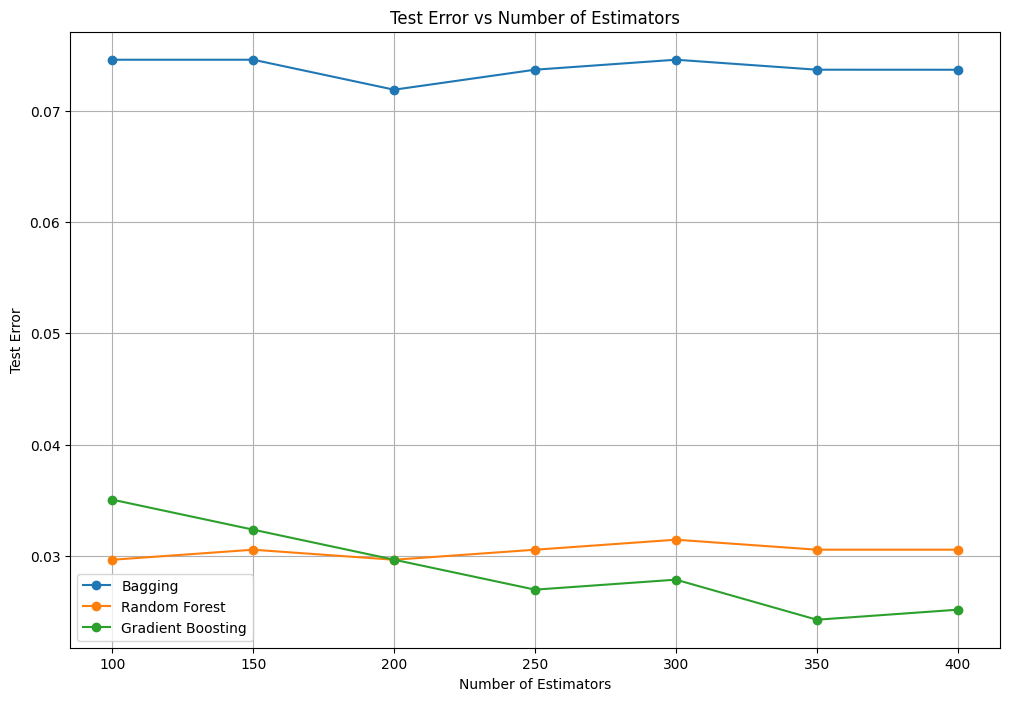

In [352]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Define the range of n_estimators values to search
param_grid = {'n_estimators': range(100, 401, 50)}


# Perform grid search with 5-fold cross-validation for Bagging
grid_search_bagging = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_bagging.fit(X_train, y_train)

# Extract results for Bagging
results_bagging = grid_search_bagging.cv_results_
mean_test_scores_bagging = results_bagging['mean_test_score']

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Extract results for Random Forest
results_rf = grid_search_rf.cv_results_
mean_test_scores_rf = results_rf['mean_test_score']


# Perform grid search with 5-fold cross-validation for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Extract results for Gradient Boosting
results_gb = grid_search_gb.cv_results_
mean_test_scores_gb = results_gb['mean_test_score']

# Plot the outcomes of accuracy for n_estimators values for all three classifiers
n_estimators_values = range(100, 401, 50)

plt.figure(figsize=(12, 8))
plt.plot(n_estimators_values, 1 - mean_test_scores_bagging, marker='o', linestyle='-', label='Bagging')
plt.plot(n_estimators_values, 1 - mean_test_scores_rf, marker='o', linestyle='-', label='Random Forest')
plt.plot(n_estimators_values, 1 - mean_test_scores_gb, marker='o', linestyle='-', label='Gradient Boosting')
plt.title('Test Error vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Error')
plt.xticks(n_estimators_values)
plt.grid(True)
plt.legend()
plt.show()
